## Data Exploration


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../DataSet/cardiovascular_diseases.csv",sep = ';'  )


In [3]:
df.head(5) 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
55086,78580,19177,2,162,64.0,160,100,1,1,0,0,0,1
41519,59318,18829,1,155,65.0,120,70,1,1,0,0,1,0
65126,92966,14667,2,168,69.0,130,80,1,1,1,0,1,0
48574,69360,21139,1,163,81.0,130,90,3,3,0,0,1,1
11183,15991,22083,1,120,80.0,120,80,1,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### From these info we can already see that the data has no missing values

In [7]:
#show the shape of my dataset by useing shape
df.shape

(70000, 13)

In [8]:
#the names of the columns
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Data Pre-Processing

In [10]:
#drop in useful column that contains data it will not be used in data analysis 
df=df.drop('id', axis=1)

In [11]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
df.shape

(70000, 12)

In [13]:
#Calculate the age by year
df['age']=round(df['age']/365.25)

In [14]:
df.head(5) 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
#Use the height and weight to calculate BMI(Body Mass Index)
df['bmi']=round((df['weight']/(df['height']/100)**2), 1)

In [16]:
df.tail(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.9
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.1
69999,56.0,1,170,72.0,120,80,2,1,0,0,1,0,24.9


In [17]:
#Change the value of gender from 1 and 2 to Male and Female :
def gender(gender):
    if gender==1:
        return 'Female'
    else:
        return 'Male'
    

In [18]:
df['gender']=df.gender.apply(gender)

In [19]:
df.tail(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69995,53.0,Male,168,76.0,120,80,1,1,1,0,1,0,26.9
69996,62.0,Female,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,52.0,Male,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,61.0,Female,163,72.0,135,80,1,2,0,0,0,1,27.1
69999,56.0,Female,170,72.0,120,80,2,1,0,0,1,0,24.9


In [21]:
#Use the blood pressure categories to change the values of ap_hi and the ap_lo
def blood_pressure_categories(x,y):
    if x<=120 and y<=80:
        return 'Normal'
    elif x<=129 and y<=80:
        return 'Elevated'
    elif x<=139 or y<=89:
        return 'Stage_1'
    elif x<=180 or y<=120:
        return "Stage_2"
    elif x>180 or y>120:
        return 'Stage_3'
    else:
        return None

In [22]:
df['bp_c']=df.apply(lambda x:blood_pressure_categories(x['ap_hi'],x['ap_lo']),axis=1)


In [23]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_c
0,50.0,Male,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal
1,55.0,Female,156,85.0,140,90,3,1,0,0,1,1,34.9,Stage_2
2,52.0,Female,165,64.0,130,70,3,1,0,0,0,1,23.5,Stage_1
3,48.0,Male,169,82.0,150,100,1,1,0,0,1,1,28.7,Stage_2
4,48.0,Female,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal


In [24]:
df[["age","smoke","active","bmi","ap_hi","ap_lo"]].describe()

,age,smoke,active,bmi,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,0.088129,0.803729,27.555311,128.817286,96.630414
std,6.760171,0.283484,0.397179,6.092596,154.011419,188.472530
min,30.000000,0.000000,0.000000,3.500000,-150.000000,-70.000000
25%,48.000000,0.000000,1.000000,23.900000,120.000000,80.000000
50%,54.000000,0.000000,1.000000,26.400000,120.000000,80.000000
75%,58.000000,0.000000,1.000000,30.200000,140.000000,90.000000
max,65.000000,1.000000,1.000000,298.700000,16020.000000,11000.000000


#### The mean age is 53.
#### The percentage of smokers is 8.
#### The percentage of do sports is 80.


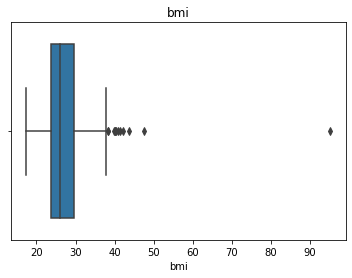

In [25]:
#Find the outlier for bmi column by using boxplot  
bmi = sns.boxplot(x="bmi", data=df[3:298] )
bmi.title.set_text('bmi')

In [26]:
# Drop the outlier from BMI
df=df.drop(df[df.bmi>35].index)

In [27]:
df.shape

(63807, 14)

In [28]:
# Drop the impossible value for ap_hi and ap_lo
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)


In [29]:
df.shape

(62784, 14)

## Data Visualization

In [30]:
df[["gender","cardio"]].groupby(["gender"], as_index = False).mean().sort_values(by="cardio",ascending = False)

,gender,cardio
1,Male,0.489480
0,Female,0.470781


Male's cardiovascular disease rate is higher

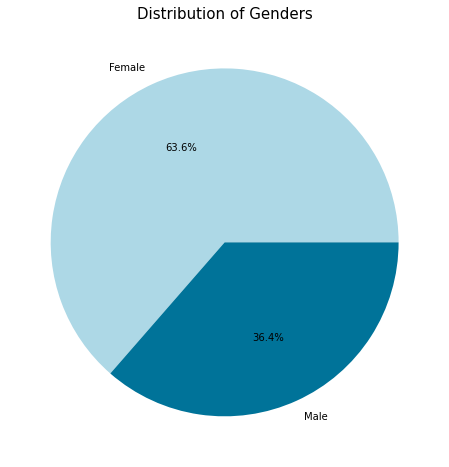

In [58]:
labels = df['gender'].value_counts().index
sizes = df['gender'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors = ['#ADD8E6','#007399'])
plt.title("Distribution of Genders",color = 'black',fontsize = 15);

#### The percentage of females with cardiovascular diseases is 63.6%.
#### The percentage of males with cardiovascular diseases is 36.4%.


#### Relation between the age and cardiovascular diseases.

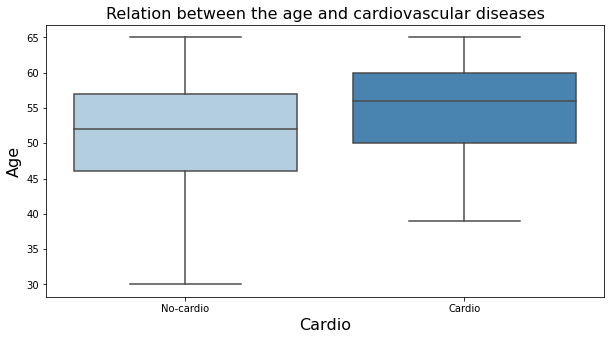

In [48]:
plt.figure(figsize = (10,5))
age = sns.boxplot(x="cardio", y="age", data=df ,palette='Blues')
age.set_xticklabels(['No-cardio','Cardio'])
plt.title('Relation between the age and cardiovascular diseases', fontsize=16)
plt.xlabel("Cardio", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.savefig('Age.png');

#### The old people are more likely to have the cardiovascular diseases.

#### Relation between the BMI and cardiovascular diseases.

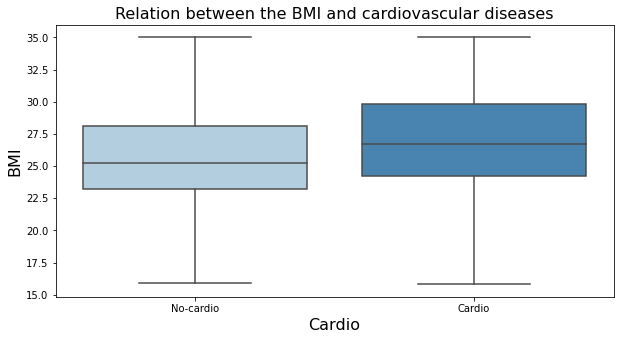

In [50]:
plt.figure(figsize = (10,5))
bmi = sns.boxplot(x="cardio", y="bmi",showfliers=False, data=df ,palette='Blues')
bmi.set_xticklabels(['No-cardio','Cardio'])
plt.title('Relation between the BMI and cardiovascular diseases', fontsize=16)
plt.xlabel("Cardio", fontsize=16)
plt.ylabel("BMI", fontsize=16);

#### The people with higher body mass index are more likely to have cardiovascular diseases.

#### Relation between the glucose and cardiovascular diseases.

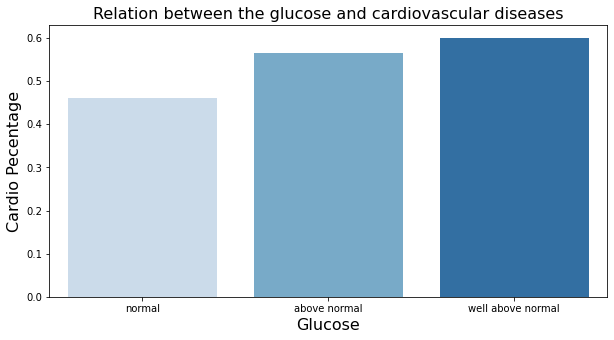

In [49]:
plt.figure(figsize = (10,5))
gluc_data = df.groupby('gluc').mean()
gluc=sns.barplot(data=gluc_data, x=gluc_data.index, y='cardio',palette='Blues')
gluc.set_xticklabels(['normal', 'above normal','well above normal'])
plt.title('Relation between the glucose and cardiovascular diseases', fontsize=16)
plt.xlabel("Glucose", fontsize=16)
plt.ylabel("Cardio Pecentage", fontsize=16)
plt.savefig('glucose.png');

#### The people who have well above normal levels of glucose are more likely to have a cardiovascular disease.

#### Relation between the cholesterol and cardiovascular diseases.

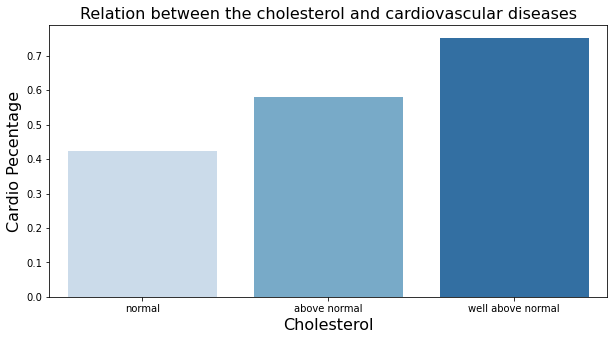

In [51]:
plt.figure(figsize = (10,5))
cholesterol_data = df.groupby('cholesterol').mean()
cholesterol=sns.barplot(data=cholesterol_data, x=cholesterol_data.index, y='cardio',palette='Blues')
cholesterol.set_xticklabels(['normal', 'above normal','well above normal'])
plt.title('Relation between the cholesterol and cardiovascular diseases', fontsize=16)
plt.xlabel("Cholesterol", fontsize=16)
plt.ylabel("Cardio Pecentage", fontsize=16);

#### The people who have well above normal levels of cholesterol are more likely to have a cardiovascular disease.

#### Relation between the smoking and cardiovascular diseases.

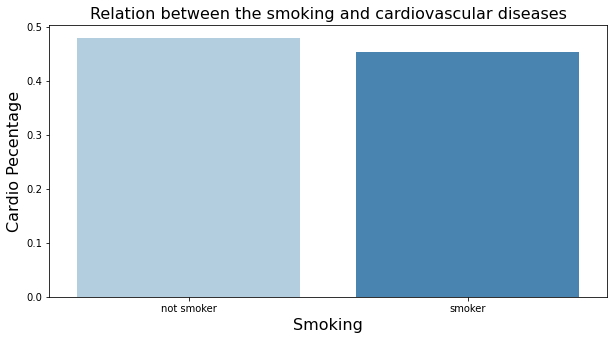

In [52]:
plt.figure(figsize = (10,5))
smoke_data=df.groupby(["smoke"]).mean()
smoke=sns.barplot(data=smoke_data ,x=smoke_data.index, y='cardio',palette='Blues')
smoke.set_xticklabels(['not smoker', 'smoker'])
plt.title('Relation between the smoking and cardiovascular diseases', fontsize=16)
plt.xlabel("Smoking", fontsize=16)
plt.ylabel("Cardio Pecentage", fontsize=16);

#### There is no strong bond relationship between smoking and  cardiovascular diseases.

#### Relation between drink alcohol and cardiovascular diseases.

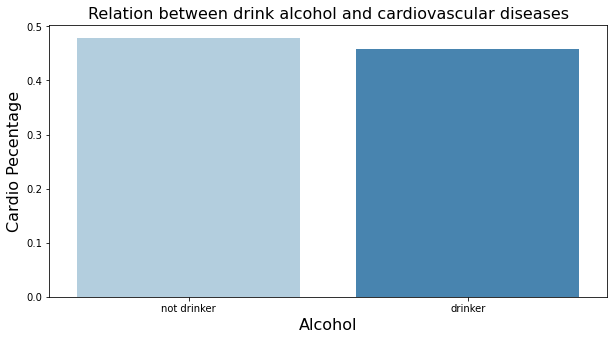

In [53]:
plt.figure(figsize = (10,5))
alco_data=df.groupby(["alco"]).mean()
alco=sns.barplot(data=alco_data,x=alco_data.index,y='cardio',palette='Blues')
alco.set_xticklabels(['not drinker', 'drinker'])
plt.title('Relation between drink alcohol and cardiovascular diseases', fontsize=16)
plt.xlabel("Alcohol", fontsize=16)
plt.ylabel("Cardio Pecentage", fontsize=16);

#### There is no strong bond relationship between drinking alcohol and  cardiovascular diseases.

#### Relation between the athlete and cardiovascular diseases.

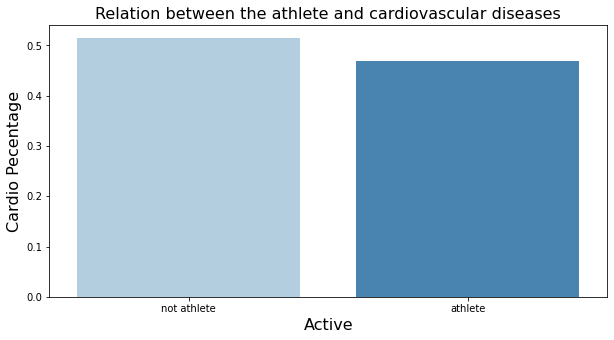

In [54]:
plt.figure(figsize = (10,5))
active_data=df.groupby(["active"]).mean()
active=sns.barplot(data=active_data,x=active_data.index,y='cardio',palette='Blues')
active.set_xticklabels(['not athlete', 'athlete'])
plt.title('Relation between the athlete and cardiovascular diseases', fontsize=16)
plt.xlabel("Active", fontsize=16)
plt.ylabel("Cardio Pecentage", fontsize=16);

#### The inactive people might develop cardiovascular diseases.

#### Relation between the blood pressure and cardiovascular diseases.

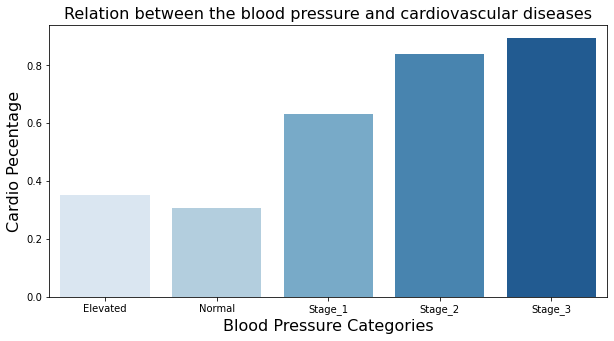

In [55]:
plt.figure(figsize = (10,5))
bp_c_data=df.groupby(["bp_c"]).mean()
bp_c=sns.barplot(data=bp_c_data,x=bp_c_data.index,y='cardio',palette='Blues')
plt.title('Relation between the blood pressure and cardiovascular diseases', fontsize=16)
plt.xlabel("Blood Pressure Categories", fontsize=16)
plt.ylabel("Cardio Pecentage", fontsize=16)
plt.savefig('B_P_C.png');

#### where people who develop high blood pressure levels have the highest chances of having cardiovascular diseases.